<a href="https://colab.research.google.com/github/JazmineOrtiz/Simulaci-n-I/blob/main/Aceptaci%C3%B3n_y_rechazo_Tarea_def.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Librerías que utilizaremos:

import random as rd
import matplotlib.pyplot as plt
import numpy as np

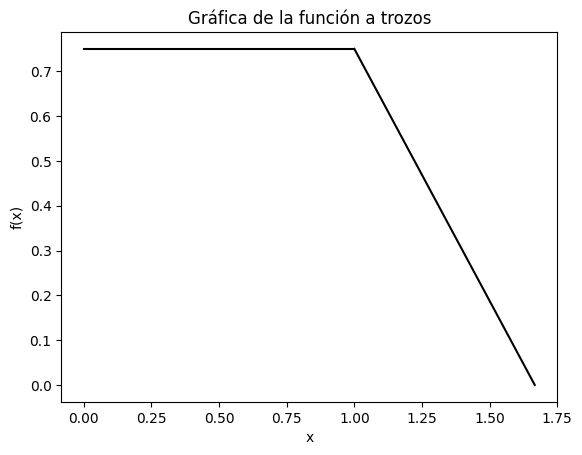

In [2]:
#Función de probabilidad

# Definir los segmentos de la función
X1 = np.linspace(0, 1, 50)
Y1 = np.full_like(X1, 3/4)  # Función constante en el primer segmento

X2 = np.linspace(1, 5/3, 50)
Y2 = (-9/8 * X2) + 15/8  # Función lineal en el segundo segmento

# Crear la figura y los ejes
plt.figure()

# Graficar cada segmento
plt.plot(X1, Y1, 'k')  # Primer segmento
plt.plot(X2, Y2, 'k')  # Segundo segmento

# Configurar las etiquetas y el título
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de la función a trozos')

# Mostrar la gráfica
plt.show()


In [3]:
#Comprobamos que la integraal da igual a 1

from sympy import symbols, integrate

# Definir la variable
x = symbols('x')

# Definir las funciones en los intervalos
f1 = 3/4
f2 = -9/8 * x + 15/8

# Calcular las integrales definidas
integral1 = integrate(f1, (x, 0, 1))
integral2 = integrate(f2, (x, 1, 5/3))

# Sumar las integrales
total_integral = integral1 + integral2

total_integral.evalf()


1.00000000000000

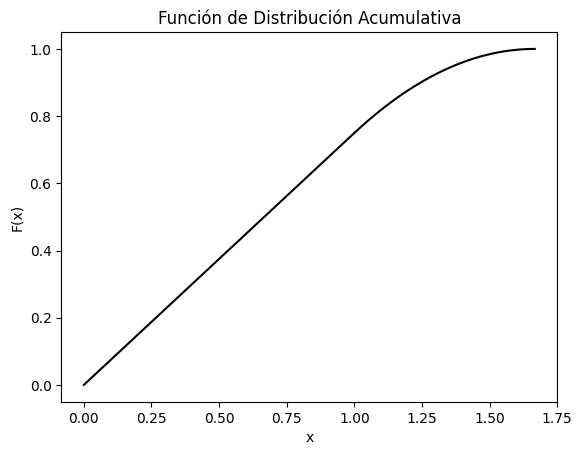

In [9]:
#Función acumulativa:

# Definir los segmentos de la función acumulativa (CDF)
# Segmento 1: 0 <= x < 1
X1 = np.linspace(0, 1, 50)
Y1 = 3/4 * X1

# Segmento 2: 1 <= x <= 5/3
X2 = np.linspace(1, 5/3, 50)
Y2 = 0.75 + ((-9/8 * X2**2) / 2 + 15/8 * X2) - (-9/16 + 15/8)

# Crear la figura y los ejes
plt.figure()

# Graficar cada segmento
plt.plot(X1, Y1, 'k')  # Primer segmento
plt.plot(X2, Y2, 'k')  # Segundo segmento

# Configurar las etiquetas y el título
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Función de Distribución Acumulativa')

# Mostrar la gráfica
plt.show()

Usamos el método de aceptación y rechazo:

Determinar la función propuesta
𝑔
(
𝑥
)
: Elegiremos una función
𝑔
(
𝑥
) que sea mayor o igual a
𝑓
(
𝑥
) en todo el dominio de
𝑓
(
𝑥
)
. En este caso, podemos usar
𝑔
(
𝑥
)
=
1, ya que
𝑓
(
𝑥
)
≤
1
.

Generar puntos
(
𝑥
,
𝑦
)
: Generaremos puntos
(
𝑥
,
𝑦
)
 aleatorios, donde
𝑥
 proviene de la distribución de
𝑔
(
𝑥
) y
𝑦
 proviene de una distribución uniforme en el intervalo [0, 1].

Aceptar o rechazar los puntos: Aceptaremos un punto
(
𝑥
,
𝑦
)
 si
𝑦
≤
𝑓
(
𝑥
)
/
𝑔
(
𝑥
), de lo contrario, lo rechazamos.

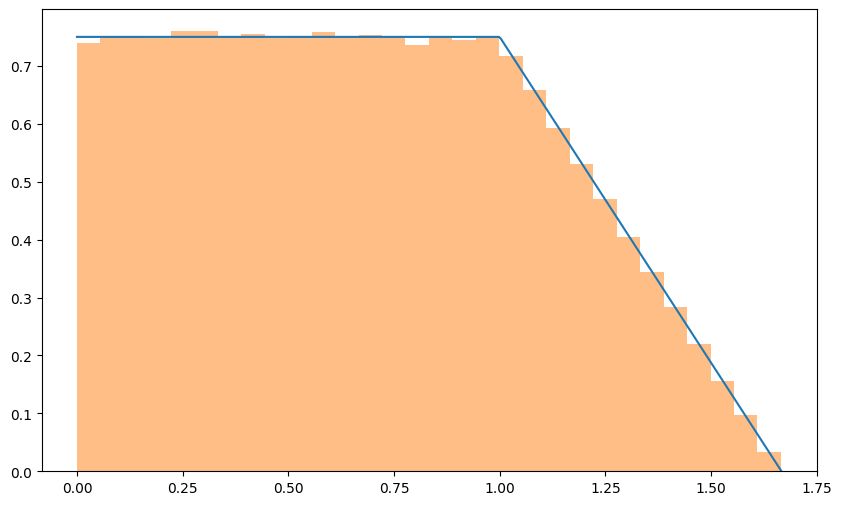

In [12]:
#Definir la función f(x)
def f(x):
    if 0 <= x <= 1:
        return 3/4
    elif 1 < x <= 5/3:
        return (3/4) * (5/3 - x) / (5/3 - 1)
    else:
        return 0

#Parámetros de la simulación
num_samples = 500000
x_min, x_max = 0, 5/3
y_max = 3/4

#Generar puntos aleatorios
samples = []
while len(samples) < num_samples:
    x = np.random.uniform(x_min, x_max)
    y = np.random.uniform(0, y_max)
    if y <= f(x):
        samples.append(x)

samples = np.array(samples)

#Graficamos la función y los puntos generados
x_values = np.linspace(0, 5/3, 400)
f_values = [f(x) for x in x_values]

plt.figure(figsize=(10, 6))
plt.plot(x_values, f_values, label='f(x)')
plt.hist(samples, bins=30, density=True, alpha=0.5, label='Muestras')

plt.show()
